In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix
from cvxopt import solvers
%matplotlib inline

/home/akshay/.local/lib/python3.5/site-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [300]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2,2]]
Y = [-1] * 20 + [1] * 20

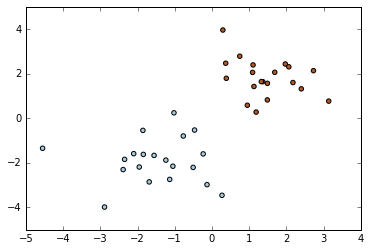

In [301]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

### Standard SVM - Primal formulation

In [148]:
z = np.zeros((3,3))
for i in range(2):
    z[i][i] = 1
P = matrix(z, tc='d')

In [149]:
q = np.zeros(3)
q[0:3] = 0
q = matrix(q,tc='d')

In [150]:
final = []
for i in range(len(Y)):
#     temp = list(np.zeros(43))
    if Y[i] == 0:
        Y[i] = -1
    temp = list(-Y[i] * X[i])
    temp.append(Y[i] * 1.0)
#     temp[3+i] = 1.0
    final.append(temp)
# temp = np.array(final)
# final = np.concatenate((temp, -np.identity(43)))

In [152]:
G = matrix(np.array(final))

In [153]:
temp = np.ones((40,1))*-1
# temp = np.concatenate((temp, np.zeros((40,1))))
h = matrix(temp, tc='d')

In [154]:
solvers.options['maxiters'] = 150

In [155]:
sol = solvers.qp(P,q,G,h)

     pcost       dcost       gap    pres   dres
 0:  3.1711e-02  5.2537e+00  9e+01  2e+00  2e+02
 1:  2.1613e-01 -8.4104e+00  1e+01  2e-01  2e+01
 2:  2.3622e-01 -6.9407e-02  3e-01  1e-03  2e-01
 3:  1.0205e-01  6.7801e-02  3e-02  3e-16  3e-16
 4:  9.5714e-02  8.9811e-02  6e-03  2e-16  2e-16
 5:  9.4920e-02  9.4495e-02  4e-04  2e-16  2e-16
 6:  9.4880e-02  9.4871e-02  9e-06  2e-16  1e-16
 7:  9.4878e-02  9.4878e-02  9e-08  1e-16  3e-16
Optimal solution found.


In [156]:
print(sol['x'][0:3])

[ 3.54e-01]
[ 2.54e-01]
[ 9.19e-02]



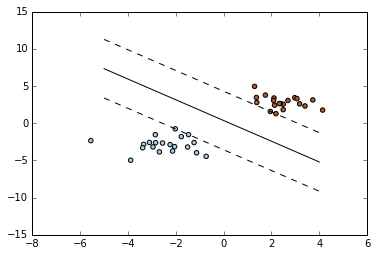

In [159]:
x = np.linspace(-5,4,10)
yy1 = -(sol['x'][0]) / sol['x'][1] * x + (sol['x'][2]) / sol['x'][1]
yy_up = (-(sol['x'][0]) * x + (sol['x'][2]) + 1) / sol['x'][1]
yy_down = (-(sol['x'][0]) * x + (sol['x'][2]) - 1)/ sol['x'][1]
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.plot(x,yy1,'k-')
plt.plot(x,yy_up,'k--')
plt.plot(x,yy_down,'k--')

### Standard SVM - Dual formulation

In [160]:
def linear_kernel(x_i,x_j):
    return np.inner(x_i,x_j)

In [ ]:
n_samples, n_feats = X.shape

K = np.zeros((n_samples, n_samples))
for i,x_i in enumerate(X):
    for j,x_j in enumerate(X):
        K[i][j] = linear_kernel(x_i,x_j)

In [208]:
P_dual = matrix(np.outer(Y,Y) * K, tc='d')

In [209]:
q_dual = matrix(np.ones(n_samples) * -1.0)

In [210]:
G_dual = matrix(np.identity(n_samples) * -1.0)

In [211]:
h_dual = matrix(np.zeros(n_samples), tc='d')

In [212]:
A_dual = matrix(Y, (1, n_samples),tc='d')

In [213]:
b_dual = matrix(0.0)

In [214]:
sol_dual = solvers.qp(P_dual,q_dual,G_dual,h_dual,A_dual,b_dual)

     pcost       dcost       gap    pres   dres
 0: -2.0188e+00 -3.1758e+00  9e+01  1e+01  2e+00
 1: -9.3915e-01 -3.9684e-01  1e+01  1e+00  2e-01
 2: -8.7878e-03 -2.3651e-01  3e-01  8e-03  1e-03
 3: -6.7801e-02 -1.0205e-01  3e-02  4e-17  6e-16
 4: -8.9811e-02 -9.5714e-02  6e-03  4e-17  4e-16
 5: -9.4495e-02 -9.4920e-02  4e-04  7e-17  4e-16
 6: -9.4871e-02 -9.4880e-02  9e-06  2e-17  6e-16
 7: -9.4878e-02 -9.4878e-02  9e-08  2e-17  5e-16
Optimal solution found.


In [215]:
w = np.array([0.0,0.0])
for i in range(n_samples):
    w = w + sol_dual['x'][i] * Y[i] * X[i]
print(w)

[ 0.35383099  0.2540872 ]


In [216]:
b = 0
count = 0
for i in range(n_samples):
    if sol_dual['x'][i] > 10**-5:
        b = b - Y[i] + np.dot(np.transpose(w),X[i])
        count += 1
b = b/count
print(b)

0.0919355547945


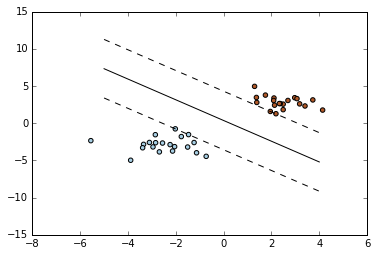

In [217]:
x = np.linspace(-5,4,10)
yy1 = -(w[0]) /w[1] * x + b / w[1]
yy_up = (-(w[0]) * x + (b) + 1) / w[1]
yy_down = (-(w[0]) * x + (b) - 1)/ w[1]
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.plot(x,yy1,'k-')
plt.plot(x,yy_up,'k--')
plt.plot(x,yy_down,'k--')

### Soft Margin SVM - Dual formulation

In [302]:
n_samples, n_feats = X.shape

K = np.zeros((n_samples, n_samples))
for i,x_i in enumerate(X):
    for j,x_j in enumerate(X):
        K[i][j] = linear_kernel(x_i,x_j)

In [303]:
P_SM = matrix(np.outer(Y,Y) * K, tc='d')

In [304]:
q_SM = matrix(np.ones(n_samples) * -1.0)

In [305]:
A_SM = matrix(Y, (1, n_samples),tc='d')
b_SM = matrix(0.0)

In [306]:
g_slack = np.identity(n_samples)
g_std = g_slack * -1.0
G_SM = matrix(np.concatenate((g_std, g_slack)), tc='d')

In [318]:
h_slack = np.ones(n_samples) * 100 #C
h_std = np.zeros(n_samples)
h_SM = matrix(np.concatenate((h_std, h_slack)), tc='d')

In [320]:
sol_SM = solvers.qp(P_SM,q_SM,G_SM, h_SM, A_SM, b_SM)

     pcost       dcost       gap    pres   dres
 0:  4.5066e+02 -1.9255e+05  5e+05  6e-01  1e-13
 1:  1.5753e+03 -3.5353e+04  6e+04  5e-02  1e-13
 2:  1.1781e+03 -2.0452e+03  3e+03  8e-04  1e-13
 3:  1.8339e+02 -2.1295e+02  4e+02  1e-06  5e-14
 4:  2.4612e+01 -3.2877e+01  6e+01  2e-16  2e-14
 5:  2.7524e+00 -5.3931e+00  8e+00  9e-16  7e-15
 6: -6.0372e-02 -1.1436e+00  1e+00  3e-16  2e-15
 7: -3.9588e-01 -6.4635e-01  3e-01  4e-16  1e-15
 8: -5.5944e-01 -6.7225e-01  1e-01  6e-16  8e-16
 9: -6.1548e-01 -6.1936e-01  4e-03  2e-16  1e-15
10: -6.1716e-01 -6.1721e-01  6e-05  2e-16  9e-16
11: -6.1718e-01 -6.1718e-01  6e-07  2e-16  8e-16
Optimal solution found.


In [321]:
w = np.array([0.0,0.0])
for i in range(n_samples):
#     if sol_SM['x'][i] > 10**-5:
#         print(i)
    w = w + sol_SM['x'][i] * Y[i] * X[i]
print(w)

[ 0.90244296  0.6480445 ]


In [322]:
b = 0
count = 0
for i in range(n_samples):
    if sol_SM['x'][i] > 10**-5:
        b = b - Y[i] + np.dot(np.transpose(w),X[i])
        count += 1
b = b/count
print(b)

0.234480140739


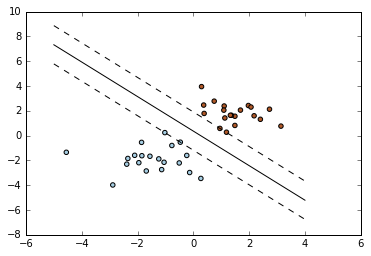

In [323]:
x = np.linspace(-5,4,10)
yy1 = -(w[0]) /w[1] * x + b / w[1]
yy_up = (-(w[0]) * x + (b) + 1) / w[1]
yy_down = (-(w[0]) * x + (b) - 1)/ w[1]
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.plot(x,yy1,'k-')
plt.plot(x,yy_up,'k--')
plt.plot(x,yy_down,'k--')

### Proximal SVM - Dual formulation

In [324]:
n_samples, n_feats = X.shape

K = np.zeros((n_samples, n_samples))
for i,x_i in enumerate(X):
    for j,x_j in enumerate(X):
        K[i][j] = linear_kernel(x_i,x_j) + 1

In [326]:
tmp = np.outer(Y,Y) * K
for i in range(n_samples):
    tmp[i][i] = tmp[i][i] + 0.5
P_p = matrix(tmp, tc='d')

In [327]:
q_p = matrix(np.ones(n_samples) * -1.0)

In [328]:
sol_p = solvers.qp(P_p,q_p)

In [332]:
w = np.array([0.0,0.0])
for i in range(n_samples):
#     if sol_SM['x'][i] > 10**-5:
#         print(i)
    w = w + sol_p['x'][i] * Y[i] * X[i]
print(w)

[ 0.23523671  0.28986002]


In [333]:
b = 0
for i in range(n_samples):
#     if sol_SM['x'][i] > 10**-5:
#         print(i)
    b = b - sol_p['x'][i] * Y[i]
print(b)

-0.017008099536500586


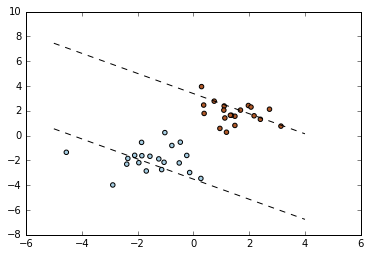

In [335]:
x = np.linspace(-5,4,10)
yy_up = (-x*w[0] + b + 1)/w[1]

yy_down = (-x*w[0] + b - 1)/w[1]
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
# plt.plot(x,yy1,'k-')
plt.plot(x,yy_up,'k--')
plt.plot(x,yy_down,'k--')